In [1]:
import numpy as np
import swiftestio as swio
import matplotlib.pyplot as plt
import timeit

In [2]:
workingdir = '/Users/daminton/work/Projects/Swiftest/Pouplin-Mars-Disk/high_high_1500_1/'

In [3]:
def readswifter(inparfile):
    inparfile = workingdir + inparfile
    param = {}
    param = swio.read_swifter_param(inparfile)
    param['BIN_OUT'] = workingdir + param['BIN_OUT']
    ds = swio.swifter2xr(param)
    ds['Mass'] = ds['Mass'] * config['GU']
    return ds

In [4]:
def readswiftest(config_file_name):
    config_file_name = workingdir + config_file_name
    config = {}
    config = swio.read_swiftest_config(config_file_name)
    config['BIN_OUT'] = workingdir + config['BIN_OUT']
    ds = swio.swiftest2xr(config)
    ds['Mass'] = ds['Mass'] * config['GU']
    ds['radmarker'] = ds['Radius'].fillna(0)
    return ds

In [5]:
disk = readswiftest('param.in')

Reading Swiftest file /Users/daminton/work/Projects/Swiftest/Pouplin-Mars-Disk/high_high_1500_1/param.in
Reading frames from file /Users/daminton/work/Projects/Swiftest/Pouplin-Mars-Disk/high_high_1500_1/bin.dat
Concatenating DataArrays
Converting DataArray to Dataset


In [6]:
disk['radmarker'].max()

<xarray.DataArray 'radmarker' ()>
array(15576.30245475)

In [7]:
disk['radmarker'].min()

<xarray.DataArray 'radmarker' ()>
array(0.)

In [11]:
disk.isel(time=2524)

<xarray.Dataset>
Dimensions:    (id: 57696)
Coordinates:
  * id         (id) float64 2.0 3.0 4.0 5.0 ... 6.619e+04 6.62e+04 6.62e+04
    time       float64 1.262e+06
Data variables:
    a          (id) float64 nan 1.072e+07 nan ... 9.118e+06 9.126e+06 9.13e+06
    e          (id) float64 nan 0.004977 nan ... 0.005287 0.005739 0.005981
    inc        (id) float64 nan 0.0009623 nan ... 0.004295 0.004207 0.004114
    capom      (id) float64 nan 1.809 nan 6.282 nan ... 5.434 5.418 5.385 5.348
    omega      (id) float64 nan 1.164 nan 5.062 nan ... 2.564 2.564 2.636 2.747
    capm       (id) float64 nan 4.363 nan 3.85 nan ... 6.257 6.273 6.234 6.161
    Mass       (id) float64 nan 2.119e-06 nan ... 3.199e-08 3.199e-08 3.199e-08
    Radius     (id) float64 nan 4.842e+03 nan 5.452e+03 ... 820.5 820.5 820.5
    radmarker  (id) float64 0.0 4.842e+03 0.0 5.452e+03 ... 820.5 820.5 820.5

TypeError: unsupported operand type(s) for /: 'str' and 'float'

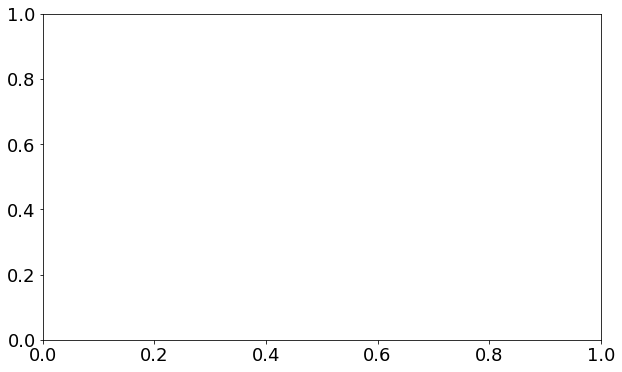

In [13]:
fig = plt.figure(1, figsize=(10,6))
ax = fig.add_subplot(111)
disk.isel(time=0).plot.scatter(x='a', y='e', markersize='radmarker')
plt.rcParams.update({'font.size': 18})
ax.set_yscale('log')
plt.ylim((1e-4,1.0))